In [1]:
from board import Board
from env import Env
from qtypes import *
from striga_scheme import StrigaDeterministicMovementScheme
from train import train
from witcher_scheme import WitcherMovementSchemeSARSA, WitcherMovementSchemeQLearning
from visualize import visualize, show_training_results


import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [2]:
## Setup

width = 7
height = 7
walls = [
    Position(width - 2, 0),
    Position(width - 2, 1),
    Position(width - 1, 1)
]
castle_position = Position(width - 1, 0)
board = Board(width, height, castle_position, walls)
striga = Striga(StrigaDeterministicMovementScheme(board, 3))
initial_state = QState(Position(0, 0), Position(3, 3))


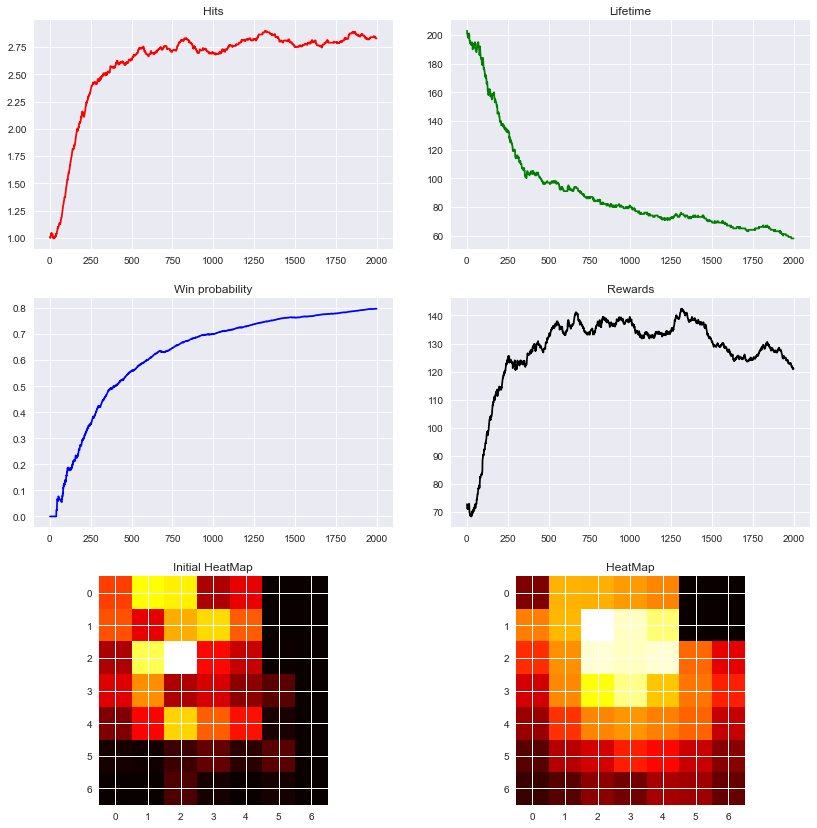

In [3]:
%matplotlib inline

witcher = Witcher(WitcherMovementSchemeQLearning(board))
results = train(board, striga, witcher, initial_state, 2000)

show_training_results(*results)

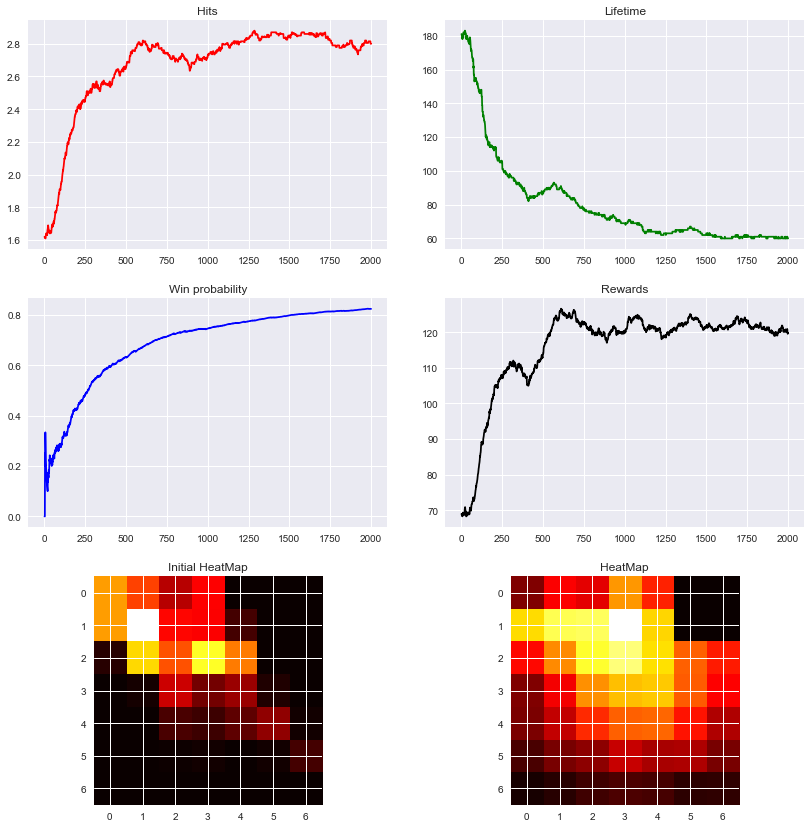

In [4]:
%matplotlib inline

witcher = Witcher(WitcherMovementSchemeSARSA(board))
results = train(board, striga, witcher, initial_state, 2000)

show_training_results(*results)

<IPython.core.display.Javascript object>


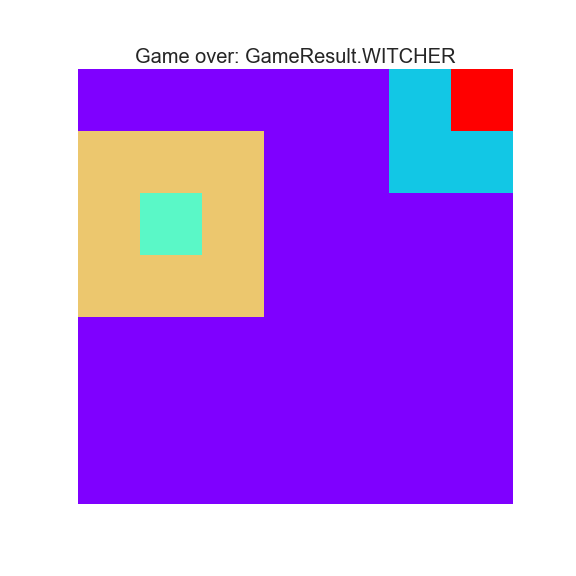

In [5]:
%matplotlib notebook

env = Env(board, initial_state, striga, witcher)
ani = visualize(env)
print(ani)